# Create the mandatory plots for Part 4

In [1]:
from lacbox.io import load_pwr, load_ind, load_inds, load_ae, load_st, save_st
from lacbox.test import test_data_path
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
import numpy as np
from aero_design_functions import  get_design_functions
import pandas as pd
import scienceplots
matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use(['science'])
# Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'normal'

# Import data

In [2]:
# Import the data from the rigid and the flexible simulations
data_rigid = np.loadtxt('BB_redesign_hawc2s_multitsr_compute_rigid_opt.opt', skiprows=1)
data_flexi = np.loadtxt('BB_redesign_compute_flex_opt.opt', skiprows=1)
data_flexi_dtu = np.loadtxt('dtu_10mw_compute_flex_opt.opt', skiprows=1)

# Rearrange the data

In [3]:
# Extract all the columns
# Rigid
wind_speed_rigid = data_rigid[:, 0]     # V [m/s]
pitch_rigid = data_rigid[:, 1]          # pitch [deg]
rot_speed_rigid = data_rigid[:, 2]      # rotor speed [rpm]
power_rigid = data_rigid[:, 3]          # aero power [kW]
thrust_rigid = data_rigid[:,4]          # thrust [kN]

# Flexi
wind_speed_flexi = data_flexi[:, 0]     # V [m/s]
pitch_flexi = data_flexi[:, 1]          # pitch [deg]
rot_speed_flexi = data_flexi[:, 2]      # rotor speed [rpm]
power_flexi = data_flexi[:, 3]          # aero power [kW]
thrust_flexi = data_flexi[:, 4]         # thrust [kN]

# DTU flexi
wind_speed_flexi_dtu = data_flexi_dtu[:, 0]     # V [m/s]
pitch_flexi_dtu = data_flexi_dtu[:, 1]          # pitch [deg]
rot_speed_flexi_dtu = data_flexi_dtu[:, 2]      # rotor speed [rpm]
power_flexi_dtu = data_flexi_dtu[:, 3]          # aero power [kW]
thrust_flexi_dtu = data_flexi_dtu[:, 4]         # thrust [kN]

R = 92.5                            # Rotor radius [m]

# Calculate the coefficients
rho = 1.225                                 # typical value for density [kg/m^3]
A = np.pi*R**2                              # rotor surface area

# Rigid
Cp_rigid = power_rigid*1000/(0.5*rho*wind_speed_rigid**3*A)    # Power coefficient [-]  
Ct_rigid = thrust_rigid*1000/(0.5*rho*wind_speed_rigid**2*A)   # Thrust coefficient [-]

# Flexi
Cp_flexi = power_flexi*1000/(0.5*rho*wind_speed_flexi**3*A)    # Power coefficient [-]  
Ct_flexi = thrust_flexi*1000/(0.5*rho*wind_speed_flexi**2*A)   # Thrust coefficient [-]

# Plotting

# Stiff vs Flexible

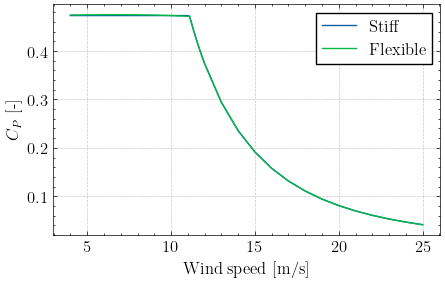

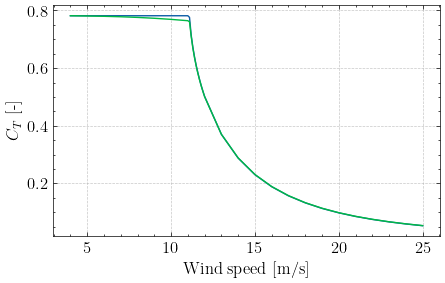

In [5]:
# Plot CP vs wind speed
plt.figure(figsize=(5, 3))
plt.plot(wind_speed_rigid, Cp_rigid, label = 'Stiff')
plt.plot(wind_speed_flexi, Cp_flexi, label = 'Flexible')
plt.xlabel('Wind speed [m/s]')
plt.ylabel(r'$C_P$ [-]')
plt.legend()
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Plots/CP_V_inf_rigid_flexi' + '.pdf', dpi=300, bbox_inches='tight')

# Plot CT vs wind speed
plt.figure(figsize=(5, 3))
plt.plot(wind_speed_rigid, Ct_rigid, label = 'Stiff')
plt.plot(wind_speed_flexi, Ct_flexi, label = 'Flexible')
plt.xlabel('Wind speed [m/s]')
plt.ylabel(r'$C_T$ [-]')
# plt.legend()
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Plots/CT_V_inf_rigid_flexi' + '.pdf', dpi=300, bbox_inches='tight')

# Flexibles BB vs DTU 10MW

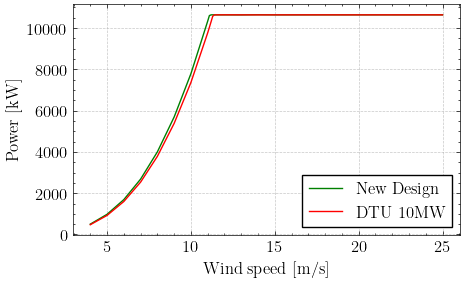

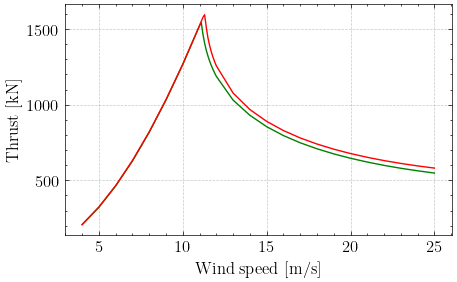

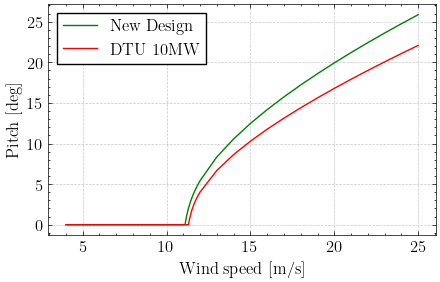

In [6]:
# Plot CP vs wind speed
plt.figure(figsize=(5, 3))
plt.plot(wind_speed_flexi, power_flexi, label = 'New Design', color='green')
plt.plot(wind_speed_flexi_dtu, power_flexi_dtu, label = 'DTU 10MW', color='red')
plt.xlabel('Wind speed [m/s]')
plt.ylabel(r'Power [kW]')
plt.legend()
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Plots/Power_V_inf_flexi_BB_DTU' + '.pdf', dpi=300, bbox_inches='tight')

# Plot CT vs wind speed
plt.figure(figsize=(5, 3))
plt.plot(wind_speed_flexi, thrust_flexi, label = 'New Design', color='green')
plt.plot(wind_speed_flexi_dtu, thrust_flexi_dtu, label = 'DTU 10MW', color='red')
plt.xlabel('Wind speed [m/s]')
plt.ylabel(r'Thrust [kN]')
# plt.legend()
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Plots/Thrust_V_inf_flexi_BB_DTU' + '.pdf', dpi=300, bbox_inches='tight')

# Plot Pitch angle vs wind speed
plt.figure(figsize=(5, 3))
plt.plot(wind_speed_flexi, pitch_flexi, label = 'New Design', color='green')
plt.plot(wind_speed_flexi_dtu, pitch_flexi_dtu, label = 'DTU 10MW', color='red')
plt.xlabel('Wind speed [m/s]')
plt.ylabel(r'Pitch [deg]')
plt.legend()
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Plots/Pitch_V_inf_flexi_BB_DTU' + '.pdf', dpi=300, bbox_inches='tight')